# CCI: Commodity Channel Index

In [64]:
import pandas as pd
import datetime as dt
import pandas_datareader as pdr
import matplotlib.pyplot as plt

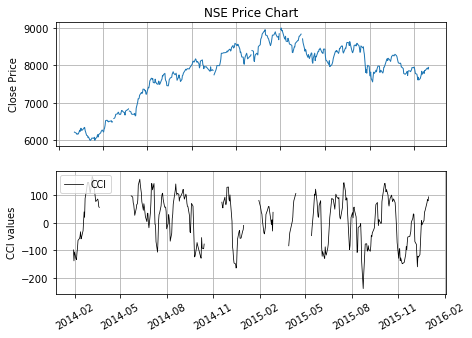

In [65]:
# Commodity Channel Index
def CCI(data, ndays):
    TP = (data['High'] + data['Low'] + data['Close']) / 3
    CCI = pd.Series((TP - pd.DataFrame.rolling(TP, ndays).mean()) / (0.015 * pd.DataFrame.rolling(TP, ndays).std()),
    name = 'CCI')
    data = data.join(CCI)
    return data

# Retrieve the Nifty data from Yahoo finance:
start = dt.datetime(2014,1,1)
end = dt.datetime(2016,1,1)
data = pdr.DataReader('^NSEI','yahoo',start,end)
data = pd.DataFrame(data)

# Compute the Commodity Channel Index(CCI) for NIFTY based on the 20-day Moving average
n = 20
NIFTY_CCI = CCI(data, n)
CCI = NIFTY_CCI['CCI']

# Plotting the Price Series chart and the Commodity Channel index below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('NSE Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(CCI,'k',lw=0.75,linestyle='-',label='CCI')
plt.legend(loc=2,prop={'size':9.5})
plt.ylabel('CCI values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

# EVM: Ease of Movement

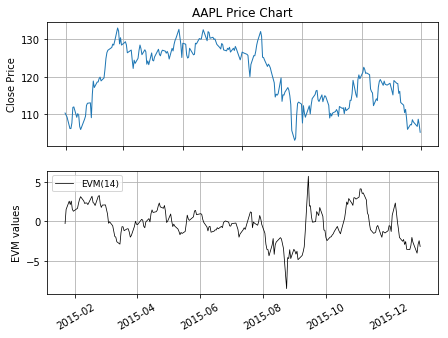

In [53]:
def EVM(data, ndays):
    dm = ((data['High'] + data['Low'])/2) - ((data['High'].shift(1) + data['Low'].shift(1))/2)
    br = (data['Volume'] / 100000000) / ((data['High'] - data['Low']))
    EVM = dm / br
    EVM_MA = pd.Series(pd.DataFrame.rolling(EVM, ndays).mean(), name = 'EVM')
    data = data.join(EVM_MA)
    return data

# Retrieve the AAPL data from Yahoo finance:
start = dt.datetime(2015,1,1)
end = dt.datetime(2016,1,1)
data = pdr.DataReader('AAPL','yahoo',start,end)
data = pd.DataFrame(data)

# Compute the 14-day Ease of Movement for AAPL
n = 14
AAPL_EVM = EVM(data, n)
EVM = AAPL_EVM['EVM']

# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('AAPL Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(EVM,'k',lw=0.75,linestyle='-',label='EVM(14)')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('EVM values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

## MA: Moving Average

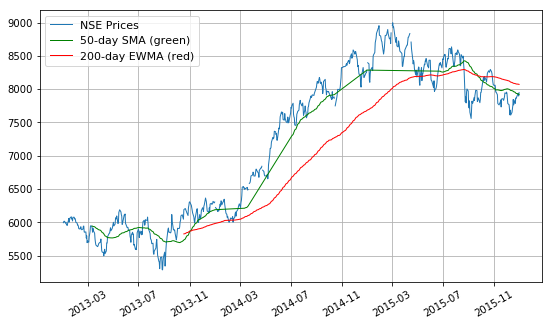

In [67]:
def SMA(data, ndays):
    SMA = pd.Series(pd.DataFrame.rolling(data['Close'], ndays).mean(), name = 'SMA')
    data = data.join(SMA)
    return data

# Exponentially-weighted Moving Average
def EWMA(data, ndays):
    EMA = data['Close'].ewm(span=ndays, min_periods = ndays-1).mean().rename('EWMA_' + str(ndays))
    data = data.join(EMA)
    return data

# Retrieve the Nifty data from Yahoo finance:
start = dt.datetime(2013,1,1)
end = dt.datetime(2016,1,1)
data = pdr.DataReader('^NSEI','yahoo',start,end)
data = pd.DataFrame(data)
close = data['Close']

# Compute the 50-day SMA for NIFTY
n = 50
SMA_NIFTY = SMA(data,n)
SMA_NIFTY = SMA_NIFTY.dropna()
SMA = SMA_NIFTY['SMA']

# Compute the 200-day EWMA for NIFTY
ew = 200
EWMA_NIFTY = EWMA(data,ew)
EWMA_NIFTY = EWMA_NIFTY.dropna()
EWMA = EWMA_NIFTY['EWMA_200']

# Plotting the NIFTY Price Series chart and Moving Averages below
plt.figure(figsize=(9,5))
plt.plot(data['Close'],lw=1, label='NSE Prices')
plt.plot(SMA,'g',lw=1, label='50-day SMA (green)')
plt.plot(EWMA,'r', lw=1, label='200-day EWMA (red)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

# ROC: Rate of Change

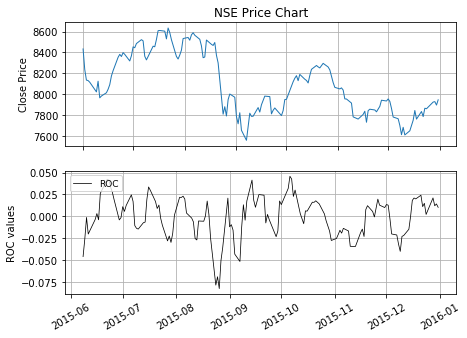

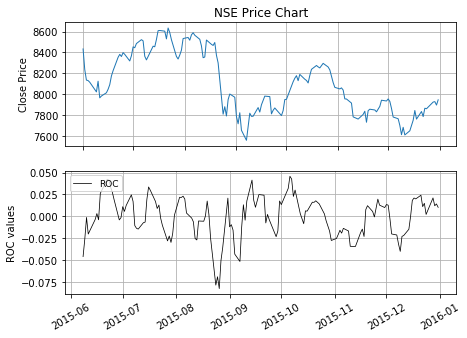

In [70]:
def ROC(data,n):
    N = data['Close'].diff(n)
    D = data['Close'].shift(n)
    ROC = pd.Series(N/D,name='Rate of Change')
    data = data.join(ROC)
    return data

# Retrieve the NIFTY data from Yahoo finance:
start = dt.datetime(2015,6,1)
end = dt.datetime(2016,1,1)
data = pdr.DataReader('^NSEI','yahoo',start,end)
data = pd.DataFrame(data)

# Compute the 5-period Rate of Change for NIFTY
n = 5
NIFTY_ROC = ROC(data,n)
ROC = NIFTY_ROC['Rate of Change']

# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('NSE Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(ROC,'k',lw=0.75,linestyle='-',label='ROC')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('ROC values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

# BB: Bollinger Bands

In [76]:
def BBANDS(data, ndays):
    MA = pd.Series(pd.DataFrame.rolling(data['Close'], ndays).mean())
    SD = pd.Series(pd.DataFrame.rolling(data['Close'], ndays).std())

    b1 = MA + (2 * SD)
    B1 = pd.Series(b1, name = 'Upper BollingerBand')
    data = data.join(B1)

    b2 = MA - (2 * SD)
    B2 = pd.Series(b2, name = 'Lower BollingerBand')
    data = data.join(B2)
    return data

# Retrieve the Nifty data from Yahoo finance:
# data = web.DataReader('^NSEI',data_source='yahoo',start='1/1/2010', end='1/1/2016')
# data = pd.DataFrame(data)

start = dt.datetime(2010,1,1)
end = dt.datetime(2016,1,1)
data = pdr.DataReader('AAPL','yahoo',start,end)
data = pd.DataFrame(data)

# Compute the Bollinger Bands for NIFTY using the 50-day Moving average
n = 50
NIFTY_BBANDS = BBANDS(data, n)
print(NIFTY_BBANDS.head())

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2009-12-31  30.447144  30.478571  30.080000  30.104286  20.301006   88102700   
2010-01-04  30.490000  30.642857  30.340000  30.572857  20.616993  123432400   
2010-01-05  30.657143  30.798571  30.464285  30.625713  20.652637  150476200   
2010-01-06  30.625713  30.747143  30.107143  30.138571  20.324135  138040000   
2010-01-07  30.250000  30.285715  29.864286  30.082857  20.286560  119282800   

            Upper BollingerBand  Lower BollingerBand  
Date                                                  
2009-12-31                  NaN                  NaN  
2010-01-04                  NaN                  NaN  
2010-01-05                  NaN                  NaN  
2010-01-06                  NaN                  NaN  
2010-01-07                  NaN                  NaN  


# FI: Force Index

In [77]:
def ForceIndex(data, ndays): 
    FI = pd.Series(data['Close'].diff(ndays) * data['Volume'], name = 'ForceIndex') 
    data = data.join(FI) 
    return data


# Retrieve the Apple data from Yahoo finance:
# data = web.DataReader('AAPL',data_source='yahoo',start='1/1/2010', end='1/1/2016')
# data = pd.DataFrame(data)

start = dt.datetime(2010,1,1)
end = dt.datetime(2016,1,1)
data = pdr.DataReader('AAPL','yahoo',start,end)
data = pd.DataFrame(data)



# Compute the Force Index for Apple 
n = 1
AAPL_ForceIndex = ForceIndex(data,n)
print(AAPL_ForceIndex.head())

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2009-12-31  30.447144  30.478571  30.080000  30.104286  20.301006   88102700   
2010-01-04  30.490000  30.642857  30.340000  30.572857  20.616993  123432400   
2010-01-05  30.657143  30.798571  30.464285  30.625713  20.652637  150476200   
2010-01-06  30.625713  30.747143  30.107143  30.138571  20.324135  138040000   
2010-01-07  30.250000  30.285715  29.864286  30.082857  20.286560  119282800   

              ForceIndex  
Date                      
2009-12-31           NaN  
2010-01-04  5.783684e+07  
2010-01-05  7.953570e+06  
2010-01-06 -6.724508e+07  
2010-01-07 -6.645722e+06  
